In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline 

# Вспоминаем numpy

В большинстве приложений для анализа данных основной интерес представляет следующая функциональность:
+ быстрые векторные операции для переформатирования и очистки данных, выборки подмножеств и фильтрации, преобразований и других видов вычислений;
+ стандартные алгоритмы работы с  массивами, например фильтрация, удаление дубликатов и теоретико-множественные операции;
+ эффективная описательная статистика, агрегирование и  обобщение данных;
+ выравнивание данных и реляционные операции объединения и соединения разнородных наборов данных;
+ описание условной логики в виде выражений-массивов вместо циклов с ветвлением if-elif-else;
+ групповые операции с данными (агрегирование, преобразование, применение функции).

**Сравнение быстродействия**

In [22]:
array_ = np.arange(1000000)
list_ = list(array_)

In [23]:
%%time 
array_2 = array_ * 2

Wall time: 3 ms


In [24]:
%%time 
list_2 = []
for i in list_:
    list_2.append(i * 2)

Wall time: 449 ms


In [25]:
%%time 
list_2 = [i * 2 for i in list_]

Wall time: 315 ms


**Многомерные массивы**

In [26]:
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])

In [27]:
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

In [28]:
type(data)

numpy.ndarray

In [29]:
data * 2

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

In [30]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

ndarray – это обобщенный многомерный контейнер для однородных данных, т. е. в нем могут храниться только элементы одного типа. У любого массива есть атрибут shape – кортеж, описывающий размер по каждому измерению,
и атрибут dtype – объект, описывающий тип данных в массиве:

In [31]:
data.shape

(2, 3)

In [32]:
data.dtype

dtype('float64')

In [33]:
np.array(["str", 1])

array(['str', '1'], dtype='<U11')

In [35]:
np.array(["str", 1]) * 2

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U11'), dtype('int32')) -> None

**Создание массивов**

In [36]:
np.ones(10) #массив из единичек

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [37]:
np.zeros(10) #массив из нулей

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Задани 1**
+ Создать единичную матрицу 4x4;
+ Создать матрицу 4x4, заполненную 5.

In [39]:
#Создать единичную матрицу 4x4;
identity_matrix = np.eye(4, k=1)
print("Единичная матрица 4x4 с индексом диагонали 1:")
print(identity_matrix)

Единичная матрица 4x4 с индексом диагонали 1:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]


In [40]:
#Создать матрицу 4x4, заполненную 5.
identity_matrix = np.full((4, 4), 5)
print(identity_matrix)

[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]


**Возведение элементов матрицы в квадрат и возведение матрицы в квадрат**

In [41]:
m = np.array([[1, 2, 3], [4, 5, 6], [1, 2, 3]])

In [42]:
m ** 2

array([[ 1,  4,  9],
       [16, 25, 36],
       [ 1,  4,  9]], dtype=int32)

In [43]:
np.dot(m, m) #cкалярное произведение двух вектров

array([[12, 18, 24],
       [30, 45, 60],
       [12, 18, 24]])

In [44]:
m @ m #оператор матричного умножения

array([[12, 18, 24],
       [30, 45, 60],
       [12, 18, 24]])

## Индексирование

In [45]:
m

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3]])

In [46]:
m[0] #выводит первую строку

array([1, 2, 3])

In [47]:
m[0, 0] #выводит первый элемент первой2 строки, нумерация с нуля

1

In [48]:
m[0][1:] #вывод первой строки не полностью, а начиная с какотго-то элемента

array([2, 3])

**Булево индексирование**

In [49]:
m%2 == 1 #остаток от деления элемента матрицы эм на 2 равен 1

array([[ True, False,  True],
       [False,  True, False],
       [ True, False,  True]])

In [50]:
m[m%2 == 1] #вытащить элементы где остаток от деления элемента матрицы эм на 2 равен 1

array([1, 3, 5, 1, 3])

In [51]:
m[~m%2 == 1] #вытащить элементы где остаток от деления элемента матрицы эм на 2 НЕ равен 1

array([2, 4, 6, 2])

In [52]:
m[~m%2 == 1] = 100
m
#вытащить элементы где остаток от деления элемента матрицы эм на 2 НЕ равен 1 и заменить их на 100

array([[  1, 100,   3],
       [100,   5, 100],
       [  1, 100,   3]])

In [53]:
m.T #транспанирование матрицы

array([[  1, 100,   1],
       [100,   5, 100],
       [  3, 100,   3]])

In [54]:
np.arange(15) #делаем одну строку

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [55]:
arr = np.arange(15).reshape((3, 5))
arr #перерешёпываем её в матрицу 3 на 5

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [56]:
arr.swapaxes(0, 1) #преобразование массива, с такими параметрами можно использовать как альтернативу транспанированию

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [57]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

**Задание 2**\
Отобрать те строки data, где на соответствующих позициях в names имя Леша или Петя.

In [58]:
names = np.array(["Настя", "Петя", "Вася", "Юра", "Паша", "Леша", "Леша"])
data = np.array([[4, 8], [1, 5], [-3, 9], [99, 0], [13, 22], [12, 49], [31, 4]])

In [59]:
# ваш ответ 
data[(names == "Леша")|(names == "Петя")]

array([[ 1,  5],
       [12, 49],
       [31,  4]])

## Быстрые поэлементные операции над массивами

In [60]:
arr = np.arange(10)

In [61]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [62]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [63]:
np.maximum(np.sqrt(arr), np.exp(arr)/3)

array([3.33333333e-01, 1.00000000e+00, 2.46301870e+00, 6.69517897e+00,
       1.81993833e+01, 4.94710530e+01, 1.34476264e+02, 3.65544386e+02,
       9.93652662e+02, 2.70102798e+03])

In [64]:
np.floor(np.sqrt(arr)) #округление вниз

array([0., 1., 1., 1., 2., 2., 2., 2., 2., 3.])

In [65]:
np.ceil(np.sqrt(arr)) #округление вверх

array([0., 1., 2., 2., 2., 3., 3., 3., 3., 3.])

In [66]:
np.round(np.sqrt(arr)) #обычное округлени

array([0., 1., 1., 2., 2., 2., 2., 3., 3., 3.])

## Программирование на основе массивов

In [67]:
points = np.arange(-5, 5, 0.01) # 100 равноотстоящих точек
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [68]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [69]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [70]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [71]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [72]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [73]:
result = np.where(cond, xarr, yarr)

In [74]:
np.where(xarr > 1.3, 2, xarr)

array([1.1, 1.2, 1.3, 2. , 2. ])

**Задача 3**\
Сгенерировать массив из случайных положительных чисел произвольной длины. Вывести элементы, которые больше среднего арифметического.

In [80]:
example = np.random.random_sample(size = (4,4))

In [81]:
example

array([[0.62366259, 0.47636835, 0.10648133, 0.40424385],
       [0.25384048, 0.28301341, 0.380141  , 0.16690277],
       [0.07347061, 0.88921661, 0.06376095, 0.70110002],
       [0.66506268, 0.83039675, 0.97586287, 0.49786519]])

In [82]:
example[example > example.mean()]

array([0.62366259, 0.47636835, 0.88921661, 0.70110002, 0.66506268,
       0.83039675, 0.97586287, 0.49786519])

**Задача 4**\ (&)
Сгенерировать массив из 20 случайных элементов, элементы которого лежат в интервале [0, 10].
+ Определить количество элементов, отличающихся от минимального на 5.
+ Найти среднее арифметическое всех четных элементов массива, стоящих на нечетных местах.

In [114]:
#1
import random
array = [random.randint(0, 10) for i in range(20)]

In [115]:
array

[6, 0, 4, 10, 4, 2, 5, 5, 8, 0, 8, 5, 4, 4, 4, 7, 0, 8, 10, 10]

In [116]:
i=0
for elements in array:
    if elements+5 == min(array) or elements-5 == min(array):
        i+=1
print('Количество элементов, отличающихся от минимального на 5: ', i)

Количество элементов, отличающихся от минимального на 5:  3


In [120]:
#2
sum_numb = 0
count_numb = 0

for i in range(1, len(array), 2):
    if array[i]%2 == 0:
        sum_numb += array[i]
        count_numb += 1
aveage = sum_numb/count_numb
print(aveage)

4.857142857142857


**Задача 5**\
Сгенерировать матрицу A размером 5 на 5, элементы которой лежат в интервале [1, 10].
+ Возвести в квадрат максимальный элемент матрицы.
+ Все четные числа заменить на 0.

In [123]:
#1
A = np.random.randint (1, 11, (5, 5))
print(max(map(max, A))**2)

In [129]:
#2
A[A%2 == 0] = 0
A

array([[9, 0, 3, 0, 0],
       [9, 0, 3, 0, 0],
       [0, 0, 0, 7, 0],
       [7, 7, 0, 0, 3],
       [1, 0, 9, 7, 5]])

**Задача 6**\
Сгенерировать матрицу B размером 5 на 5, элементы которой лежат в интервале [-5, 5]. Отрицательные элементы матрицы заменить на число отрицательных элементов в строке, в которой они находятся.

In [131]:
B = np.random.randint (-5, 5, (5, 5))
B

array([[-2,  4,  1,  0,  2],
       [-3,  4,  4, -2,  4],
       [-1, -2,  3, -1, -3],
       [-2,  0, -5, -4,  2],
       [-3,  0,  3,  4,  2]])

In [132]:
for i in range(len(B)):
    count = 0
    for j in range(len(B[i])):
        if B[i][j] < 0:
            count += 1
            B[i][j] = count
print(B)

[[1 4 1 0 2]
 [1 4 4 2 4]
 [1 2 3 3 4]
 [1 0 2 3 2]
 [1 0 3 4 2]]


# Вспоминаем pandas несильно

Какие отличия между исследовательскими университетами и школами искусств?
Используя данные из файла colleges, выдвините предположения о возможных различиях между двумя типами институтов.
Для это проведите описательный анализ исходных данных.  Выдвините несколько гипотез.
Например, "В университеты поступить сложнее (процент принятых меньше)"

Формат файла
+ School -  название школы
+ School_Type - тип школы (школа искусств  'LibArts', исследовательский университет 'Univ')
+ SAT - медиана объединенных значений Math и Verbal SAT  студентов
+ Acceptance: - % принятых абитуриентов
+ $/Student  -  Деньги, расходуемые на одного студента в среднем
+ Top 10% -  % студентов в топ 10% выпускных классов
+ %PhD -  %  факультетов, имеющих PhD
+ Grad%: % студентов, которые успешно завершили обучение

In [135]:
df = pd.read_csv('colleges.txt', delimiter='\t')

In [136]:
df.head()

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86


В сведения о датафрейме входит общая информация о нём вроде заголовка, количества значений, типов данных столбцов.

In [137]:
df.info() #пропусков в данных нет, проблем с типами данных тоже нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   School       50 non-null     object
 1   School_Type  50 non-null     object
 2   SAT          50 non-null     int64 
 3   Acceptance   50 non-null     int64 
 4   $/Student    50 non-null     int64 
 5   Top 10%      50 non-null     int64 
 6   %PhD         50 non-null     int64 
 7   Grad%        50 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 3.2+ KB


Вывод статистических сведений о датафрейме:

In [138]:
df.describe()

,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1263.960000,37.840000,30247.200000,74.440000,90.560000,83.480000
std,62.329591,13.363612,15266.172682,13.515162,8.258972,7.557237
min,1109.000000,17.000000,17520.000000,47.000000,58.000000,61.000000
25%,1225.000000,25.750000,20182.250000,65.000000,86.250000,77.250000
50%,1264.000000,36.000000,24994.500000,76.500000,93.000000,85.500000
75%,1304.500000,47.750000,36803.750000,85.000000,97.750000,89.000000
max,1400.000000,67.000000,102262.000000,98.000000,100.000000,95.000000


In [139]:
df_art = df.query('School_Type =="Lib Arts"')

In [140]:
df_art['School'].unique()

array(['Amherst', 'Swarthmore', 'Williams', 'Bowdoin', 'Wellesley',
       'Pomona', 'Wesleyan (CT)', 'Middlebury', 'Smith', 'Davidson',
       'Vassar', 'Carleton', 'Claremont McKenna', 'Oberlin',
       'Washington & Lee', 'Grinnell', 'Mount Holyoke', 'Colby',
       'Hamilton', 'Bates', 'Haverford', 'Colgate', 'Bryn Mawr',
       'Occidental', 'Barnard'], dtype=object)

In [141]:
df_univ = df.query('School_Type =="Univ"')

In [142]:
df_univ['School'].unique()

array(['Harvard', 'Stanford', 'Yale', 'Princeton', 'Cal Tech', 'MIT',
       'Duke', 'Dartmouth', 'Cornell', 'Columbia', 'U of Chicago',
       'Brown', 'U Penn', 'Berkeley', 'Johns Hopkins', 'Rice', 'UCLA',
       'U Va.', 'Georgetown', 'UNC', 'U Michican', 'Carnegie Mellon',
       'Northwestern', 'Washington U (MO)', 'U of Rochester'],
      dtype=object)

In [143]:
df_univ['School'].unique() == df_art['School'].unique()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

**Задание 1**\
Проверить являются ли выборки связными.

In [144]:
df['hf'] = df['School'] + df['School_Type']

In [145]:
df['hf'].unique() #все комбинации уникальны, выборки не связанны

array(['AmherstLib Arts', 'SwarthmoreLib Arts', 'WilliamsLib Arts',
       'BowdoinLib Arts', 'WellesleyLib Arts', 'PomonaLib Arts',
       'Wesleyan (CT)Lib Arts', 'MiddleburyLib Arts', 'SmithLib Arts',
       'DavidsonLib Arts', 'VassarLib Arts', 'CarletonLib Arts',
       'Claremont McKennaLib Arts', 'OberlinLib Arts',
       'Washington & LeeLib Arts', 'GrinnellLib Arts',
       'Mount HolyokeLib Arts', 'ColbyLib Arts', 'HamiltonLib Arts',
       'BatesLib Arts', 'HaverfordLib Arts', 'ColgateLib Arts',
       'Bryn MawrLib Arts', 'OccidentalLib Arts', 'BarnardLib Arts',
       'HarvardUniv', 'StanfordUniv', 'YaleUniv', 'PrincetonUniv',
       'Cal TechUniv', 'MITUniv', 'DukeUniv', 'DartmouthUniv',
       'CornellUniv', 'ColumbiaUniv', 'U of ChicagoUniv', 'BrownUniv',
       'U PennUniv', 'BerkeleyUniv', 'Johns HopkinsUniv', 'RiceUniv',
       'UCLAUniv', 'U Va.Univ', 'GeorgetownUniv', 'UNCUniv',
       'U MichicanUniv', 'Carnegie MellonUniv', 'NorthwesternUniv',
       'Washington 

In [146]:
df_univ['School'].unique() == df_art['School'].unique()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

**Задание 2**\
Постройте ящики с усами по каждой из характеристик (SAT ... Grad%) для каждого типа институтов. Какие из следующих утверждений верны (речь идет о наблюдаемых данных)?

Text(0.5, 1.0, 'Медиана объединенных значений Math и Verbal SAT студентов')

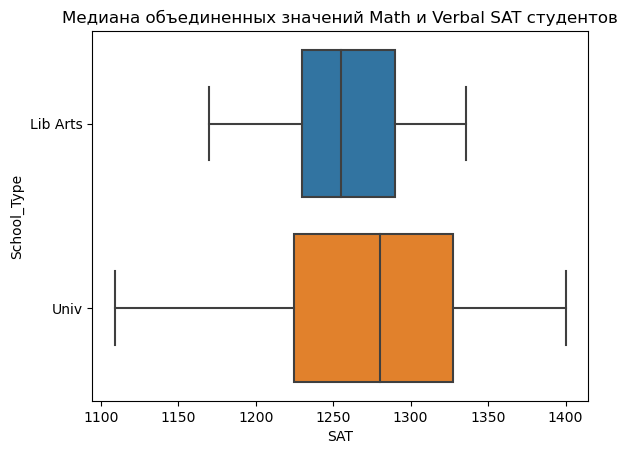

In [150]:
sns.boxplot(x='SAT', y='School_Type', data=df) 
plt.title('Медиана объединенных значений Math и Verbal SAT студентов')

Text(0.5, 1.0, '% принятых абитуриентов')

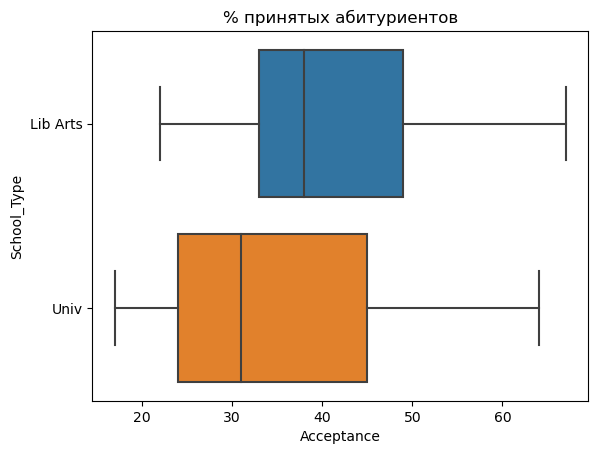

In [151]:
sns.boxplot(x='Acceptance', y='School_Type', data=df) 
plt.title('% принятых абитуриентов')

Text(0.5, 1.0, '% студентов в топ 10% выпускных классов')

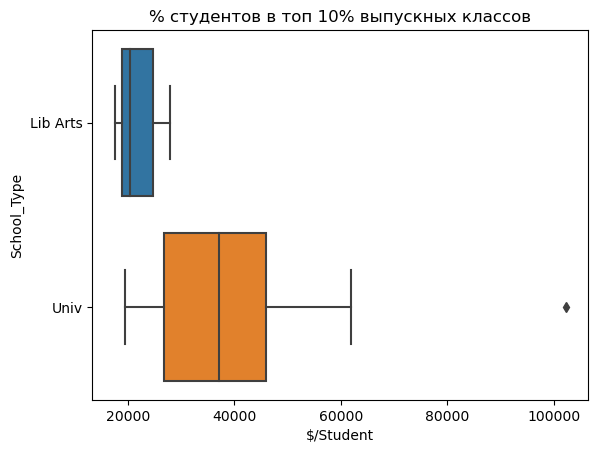

In [155]:
sns.boxplot(x='$/Student', y='School_Type', data=df) 
plt.title('% студентов в топ 10% выпускных классов')

Text(0.5, 1.0, 'Деньги расходуемые на одного студента в среднем')

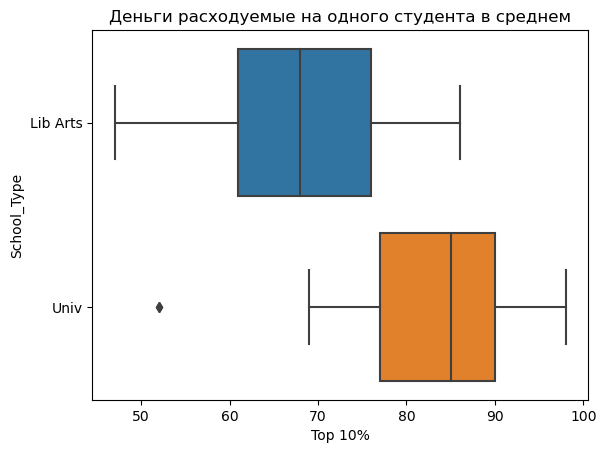

In [154]:
sns.boxplot(x='Top 10%', y='School_Type', data=df) 
plt.title('Деньги расходуемые на одного студента в среднем')

Text(0.5, 1.0, '%  факультетов, имеющих PhD')

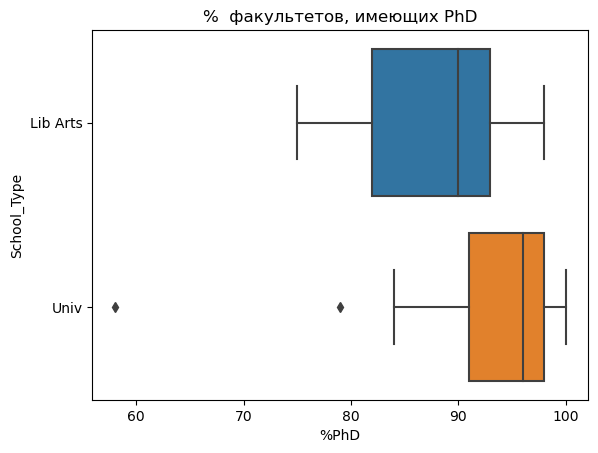

In [156]:
sns.boxplot(x='%PhD', y='School_Type', data=df) 
plt.title('%  факультетов, имеющих PhD')

Text(0.5, 1.0, '% студентов, которые успешно завершили обучение')

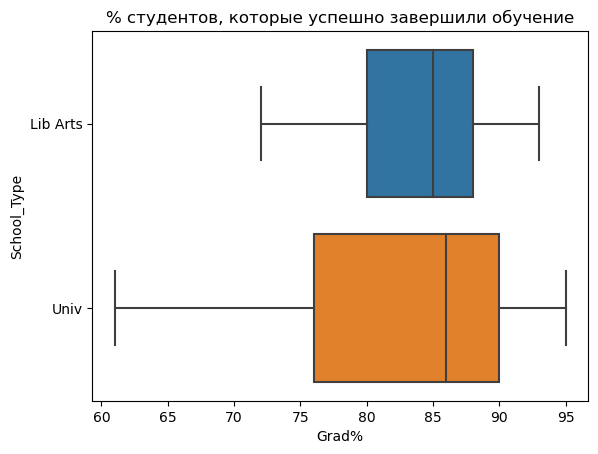

In [157]:
sns.boxplot(x='Grad%', y='School_Type', data=df) 
plt.title('% студентов, которые успешно завершили обучение')

In [174]:
%%HTML
<input type="checkbox" id="0">
<label for="0">% процент принятых студентов в школах искусств заметно ниже, чем в университетах</label><br>

<input type="checkbox" id="1">
<label for="1">Разброс средств, расходуемых в среднем на одного студента, в школах искусств больше, чем в университетах</label><br>

<input type="checkbox" id="2">
<label for="2">% процент принятых студентов в школах искусств и в университетах примерно равны</label><br>

<input type="checkbox" id="3">
<label for="3">Разброс баллов SAT в университетах ниже, чем в школах искусств</label><br>

<input type="checkbox" id="0">
<label for="0">Разброс баллов SAT в университетах выше, чем в школах искусств</label><br>

<input type="checkbox" id="0">
<label for="0">Разброс средств, расходуемых в среднем на одного студента, в школах искусств меньше, чем в университетах</label><br>

<input type="checkbox" id="0">
<label for="0">В одном из университетов тратят сильно больше денег в среднем на одного студента, чем в других университетах</label><br>

<input type="checkbox" id="0">
<label for="0">Разброс баллов SAT в университетах и школах искусств практически не различается</label><br>

<input type="checkbox" id="0">
<label for="0">% процент принятых студентов в школах искусств заметно выше, чем в университетах</label><br>

**Задание 3**\
Постройте гистограммы по каждой из характеристик (SAT ... Grad%) для каждого типа институтов. Какие из следующих утверждений верны (речь идет о наблюдаемых данных)?

Hint: для каждой пары связанных утверждений, надо выбрать одно из них.

In [173]:
%%HTML
<input type="checkbox" id="0">
<label for="0"></label>Распределение процента факультетов с Phd в школах искусств напоминает "нормальное"<br>

<input type="checkbox" id="1">
<label for="1">Распределение процента факультетов с Phd в университетах напоминает "нормальное"</label><br>

<input type="checkbox" id="2">
<label for="2"></label>Гистограмма процента студентов, которые успешно завершили университеты, имеет несколько пиков<br>

<input type="checkbox" id="3">
<label for="3">Гистограмма процента студентов, которые успешно завершили школы искусств, имеет несколько пиков</label><br>

<input type="checkbox" id="5">
<label for="5">В университетах процент факультетов с Phd выше</label><br>

<input type="checkbox" id="4">
<label for="4">В школах искусств процент факультетов с Phd выше</label><br>

In [160]:
df.head(5)

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%,hf
0,Amherst,Lib Arts,1315,22,26636,85,81,93,AmherstLib Arts
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88,SwarthmoreLib Arts
2,Williams,Lib Arts,1336,28,23772,86,90,93,WilliamsLib Arts
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90,BowdoinLib Arts
4,Wellesley,Lib Arts,1250,49,27879,76,91,86,WellesleyLib Arts


Text(0.5, 1.0, 'Медиана объединенных значений Math и Verbal SAT студентов')

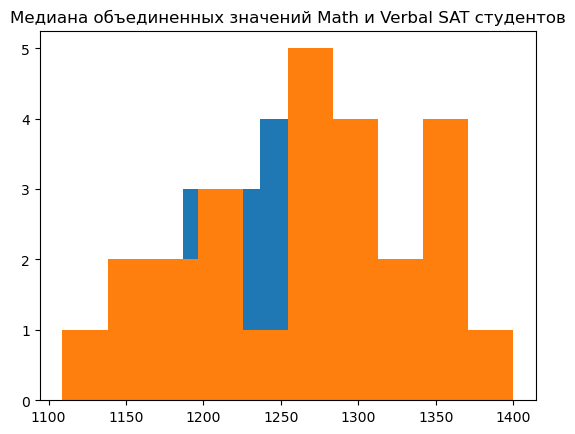

In [167]:
plt.hist(x = df[df['School_Type'] == 'Lib Arts']['SAT'])
plt.hist(x = df[df['School_Type'] != 'Lib Arts']['SAT'])
plt.title('Медиана объединенных значений Math и Verbal SAT студентов')

Text(0.5, 1.0, '% принятых абитуриентов')

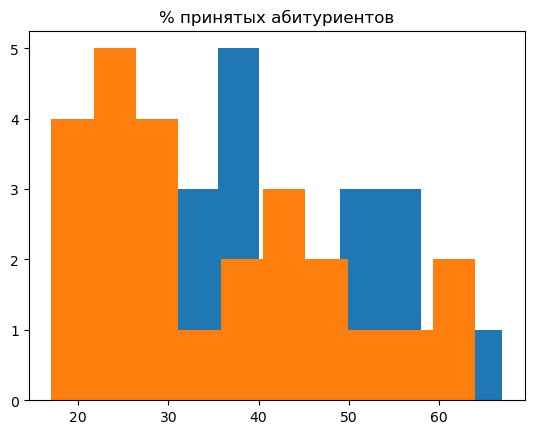

In [168]:
plt.hist(x = df[df['School_Type'] == 'Lib Arts']['Acceptance'])
plt.hist(x = df[df['School_Type'] != 'Lib Arts']['Acceptance'])
plt.title('% принятых абитуриентов')

Text(0.5, 1.0, '% студентов в топ 10% выпускных классов')

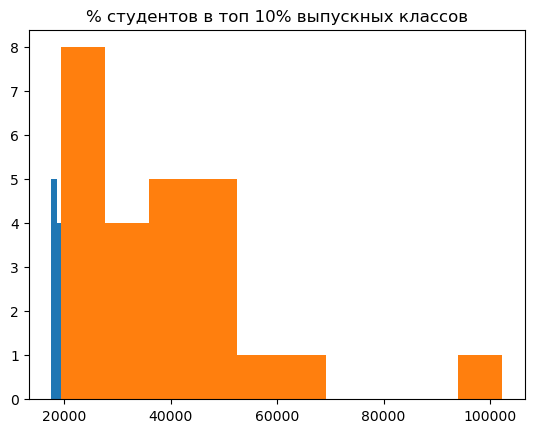

In [169]:
plt.hist(x = df[df['School_Type'] == 'Lib Arts']['$/Student'])
plt.hist(x = df[df['School_Type'] != 'Lib Arts']['$/Student'])
plt.title('% студентов в топ 10% выпускных классов')

Text(0.5, 1.0, 'Деньги расходуемые на одного студента в среднем')

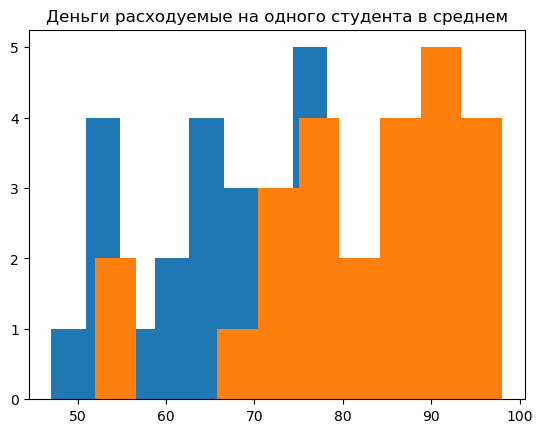

In [171]:
plt.hist(x = df[df['School_Type'] == 'Lib Arts']['Top 10%'])
plt.hist(x = df[df['School_Type'] != 'Lib Arts']['Top 10%'])
plt.title('Деньги расходуемые на одного студента в среднем')

Text(0.5, 1.0, '%  факультетов, имеющих PhD')

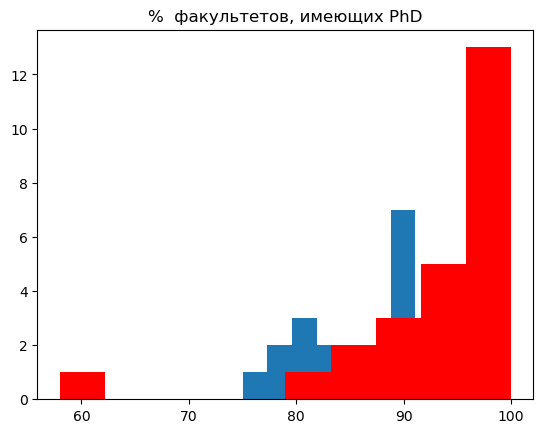

In [175]:
plt.hist(x = df[df['School_Type'] == 'Lib Arts']['%PhD'])
plt.hist(x = df[df['School_Type'] != 'Lib Arts']['%PhD'], color='red')
plt.title('%  факультетов, имеющих PhD')

Text(0.5, 1.0, '% студентов, которые успешно завершили обучение')

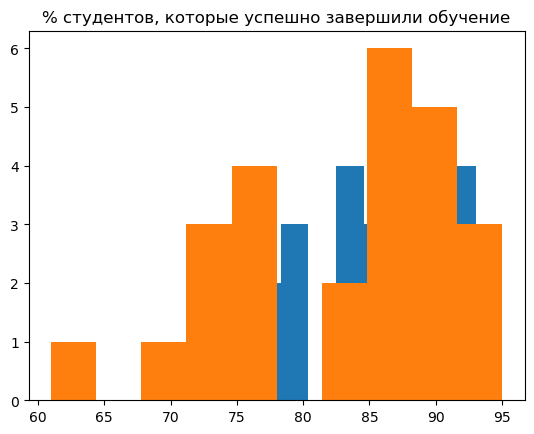

In [172]:
plt.hist(x = df[df['School_Type'] == 'Lib Arts']['Grad%'])
plt.hist(x = df[df['School_Type'] != 'Lib Arts']['Grad%'])
plt.title('% студентов, которые успешно завершили обучение')

**Задание 4**\
Найдите:
+ выборочное среднее SAT школ искусств;
+ 3й выборочный квартиль Acceptance университетов;
+ название института(колледжа), в котором тратят денег в среднем на одного студента больше, чем в других институтах(колледжах).

In [176]:
df_art['SAT'].mean() #выборочное среднее SAT школ искусств

1256.64

In [177]:
df_univ['Acceptance'].quantile([0.75])

0.75    45.0
Name: Acceptance, dtype: float64

In [178]:
df[df['$/Student'] == max(df['$/Student'])]

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%,hf
29,Cal Tech,Univ,1400,31,102262,98,98,75,Cal TechUniv
